### Hardener - P4A

Reading data	70.91 s
Preparing input	3.95 s


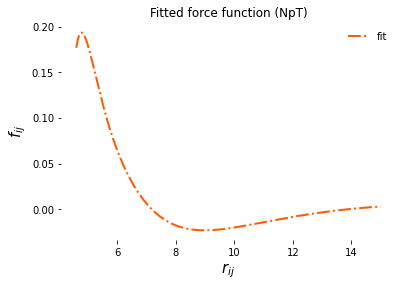

In [3]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_trajectory_match.out"
params = range(0, -15, -2)
simulation_timestep = 0.5
# These parameters affect the accuracy of the fit. 'steps' = {'NVE': , 'NpT': 3/400}
steps = 3
timesteps_in_fit = 400

proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=15,
                      basis=basis_function, basis_parameters=params,
                      every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit,
                      system_style='molecular')

proc.prepare_training_data()
proc.regress(method='bayesian')

x = np.linspace(4.6, 15, 1000)
y_fit = proc.predict(x)[0]
plot_1component(x, y_fit)

In [1]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_trajectory_match_test.out"
params = range(0, -15, -2)
simulation_timestep = 0.5
# These parameters affect the accuracy of the fit. 'steps' = {'NVE': , 'NpT': }

for steps in [2,3,4,5,6,7,8]:
    for timesteps_in_fit in [100, 200, 300, 400, 500]:
        proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=15,
                              basis=basis_function, basis_parameters=params,
                              every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit,
                              system_style='molecular')

        proc.prepare_training_data()
        proc.regress(method='bayesian')

        x = np.linspace(4.6, 15, 1000)
        y_fit = proc.predict(x)[0]
        plot_1component(x, y_fit, thermostat='NpT', output_path=f"/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/tm_npt_{steps}_{timesteps_in_fit}.png")

'\nfor steps in [2,3,4,5,6,7,8]:\n    for timesteps_in_fit in [100, 200, 300, 400, 500]:\n        proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=15,\n                              basis=basis_function, basis_parameters=params,\n                              every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit,\n                              system_style=\'molecular\')\n\n        proc.prepare_training_data()\n        proc.regress(method=\'bayesian\')\n\n        x = np.linspace(4.6, 15, 1000)\n        y_fit = proc.predict(x)[0]\n        plot_1component(x, y_fit, thermostat=\'NpT\', output_path=f"/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/tm_npt_{steps}_{timesteps_in_fit}.png")\n'

### Epoxy - DGEBA

Reading data	329.66 s
Preparing input	4.18 s


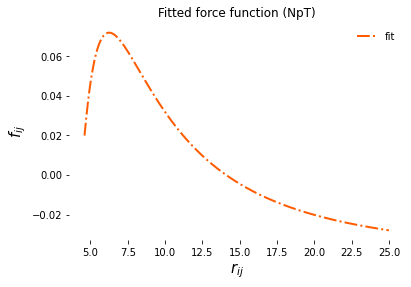

In [5]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/epoxy/epoxy_trajectory_match_test.out"
params = range(0, -15, -2)
simulation_timestep = 0.2
# These parameters affect the accuracy of the fit. 'steps' = {'NVE': , 'NpT': 3/400}
steps = 4
timesteps_in_fit = 400

proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=15,
                      basis=basis_function, basis_parameters=params,
                      every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit,
                      system_style='molecular')

proc.prepare_training_data()
proc.regress(method='bayesian')

x = np.linspace(4.6, 25, 1000)
y_fit = proc.predict(x)[0]
plot_1component(x, y_fit)

In [ ]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/epoxy/epoxy_trajectory_match_test.out"
params = range(0, -15, -2)
simulation_timestep = 0.2
# These parameters affect the accuracy of the fit. 'steps' = {'NVE': , 'NpT': }

for steps in [7,8]:
    for timesteps_in_fit in range(250, 525, 25):
        proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=15,
                              basis=basis_function, basis_parameters=params,
                              every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit,
                              system_style='molecular')

        proc.prepare_training_data()
        proc.regress(method='bayesian')

        x = np.linspace(4.6, 15, 1000)
        y_fit = proc.predict(x)[0]
        plot_1component(x, y_fit, thermostat='NpT', output_path=f"/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/epoxy/tm_npt_{steps}_{timesteps_in_fit}.png")

Reading data	311.08 s
Preparing input	2.54 s
Reading data	322.95 s
Preparing input	2.81 s
Reading data	330.26 s
Preparing input	3.02 s
Reading data	368.46 s
Preparing input	6.53 s
Reading data	430.69 s
Preparing input	7.33 s
Reading data	458.37 s
Preparing input	4.09 s
Reading data	349.62 s
Preparing input	4.19 s
Reading data	347.64 s
Preparing input	4.43 s
Reading data	354.04 s
Preparing input	4.69 s
Reading data	354.46 s
Preparing input	4.9 s
Reading data	363.21 s
Preparing input	5.13 s
Reading data	317.57 s
Preparing input	2.58 s
Reading data	325.21 s
Preparing input	2.85 s
Reading data	323.31 s
Preparing input	3.07 s
Reading data	325.96 s
Preparing input	3.5 s
Reading data	328.5 s
Preparing input	3.58 s
Reading data	335.81 s
Preparing input	3.82 s
Reading data	338.8 s
Preparing input	4.11 s
Reading data	341.24 s
Preparing input	4.31 s
Reading data	350.37 s
Preparing input	4.45 s
Reading data	